<a href="https://colab.research.google.com/github/NadimMahmud3219/NLP/blob/main/CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
# prompt: import pandas, numpy, CountVectorizer, MulyinomialNB, train_test_split, nltk, word_tokenize, WordNetLemmatizer, porterstemmer, wordnet

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet

In [29]:
# prompt: download spam mail dataset with two features

!wget https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv -O spam.csv
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)


--2024-09-09 14:39:17--  https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [application/octet-stream]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.03s   

2024-09-09 14:39:17 (16.7 MB/s) - ‘spam.csv’ saved [503663/503663]



In [30]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# prompt: separate two columns'

inputs = df['text']
labels = df['label']


In [37]:
labels.value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label'>

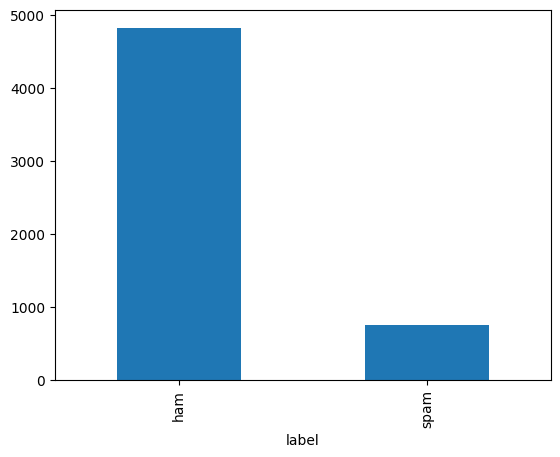

In [38]:
# prompt: generate a histogram for labels

labels.value_counts().plot(kind='bar')


In [40]:
# prompt: split the dataset

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)


In [41]:
# prompt: apply count vectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [43]:
# prompt: balance the dataset using smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)


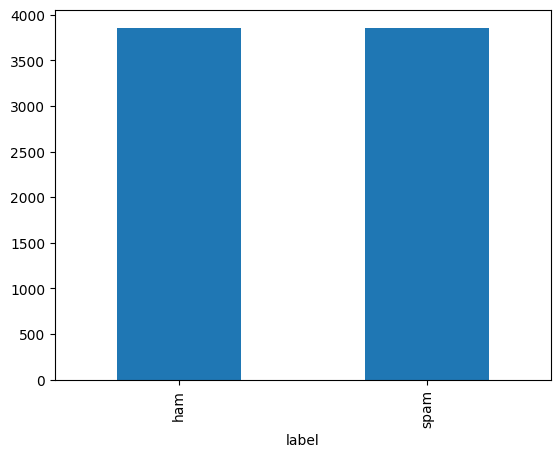

In [46]:
# prompt: plot y_train_resempled

import matplotlib.pyplot as plt

# Assuming y_train_resampled is a pandas Series or a NumPy array
y_train_resampled.value_counts().plot(kind='bar')
plt.show()


In [52]:
(X_train_resampled != 0).sum()

88175

In [55]:
#what percentage of values are non zero?
(X_train_resampled != 0).sum() / np.prod(X_train_resampled.shape)

0.0014766169520817494

In [56]:
#apply model
classifier = MultinomialNB()
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test_counts)


In [57]:
# prompt: calculating train and test accuracy

from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_pred = classifier.predict(X_train_counts)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9896791563832175
Test Accuracy: 0.9730941704035875


In [65]:
#useing stop_wards
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)
print("Train score", model.score(X_train_counts, y_train) )
print("Test score", model.score(X_test_counts, y_test) )

Train score 0.9939421135292797
Test score 0.9829596412556054
